In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


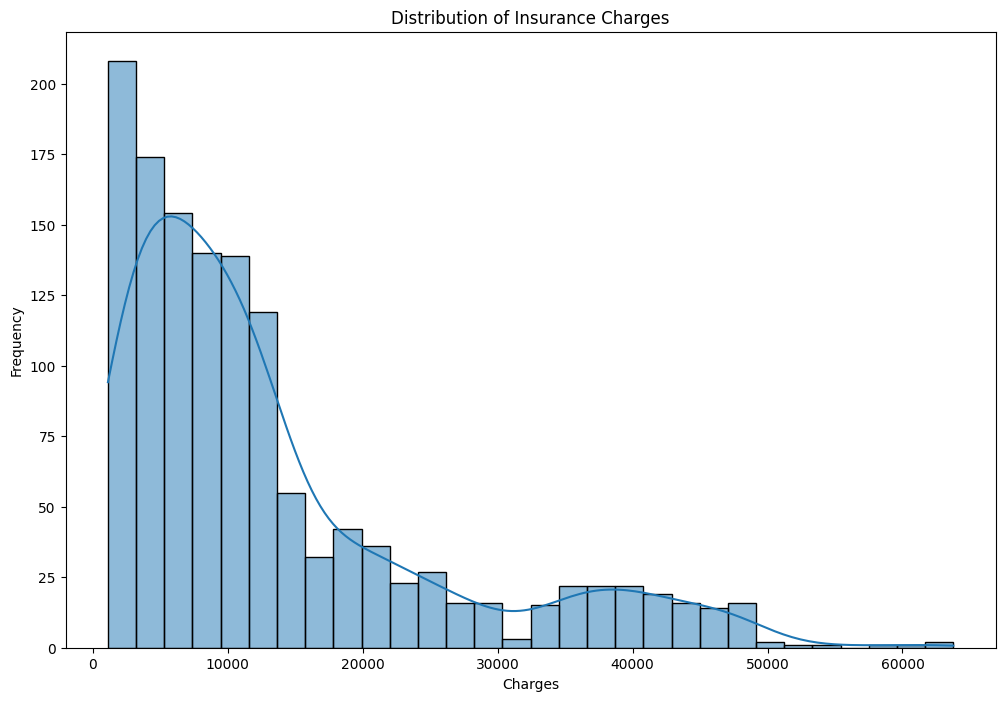

In [94]:
plt.figure(figsize=(12, 8))
sns.histplot(insurance['charges'], kde=True, bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

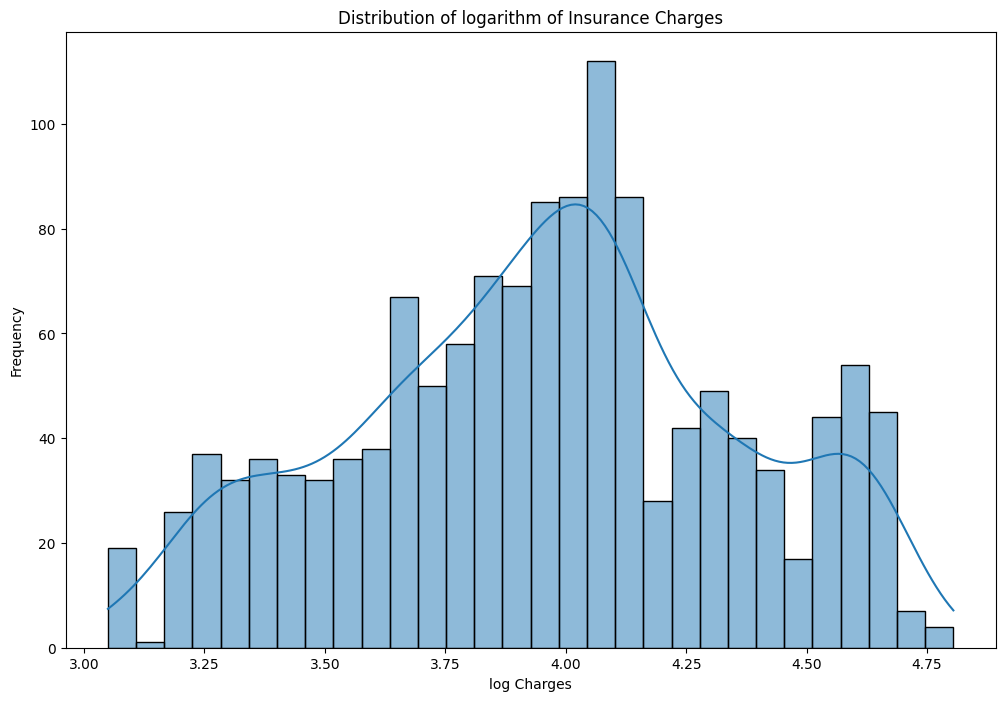

In [95]:
insurance["log_charges"] = np.log10(insurance["charges"])
plt.figure(figsize=(12, 8))
sns.histplot(insurance['log_charges'], kde=True, bins=30)
plt.title('Distribution of logarithm of Insurance Charges')
plt.xlabel('log Charges')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'log_charges')

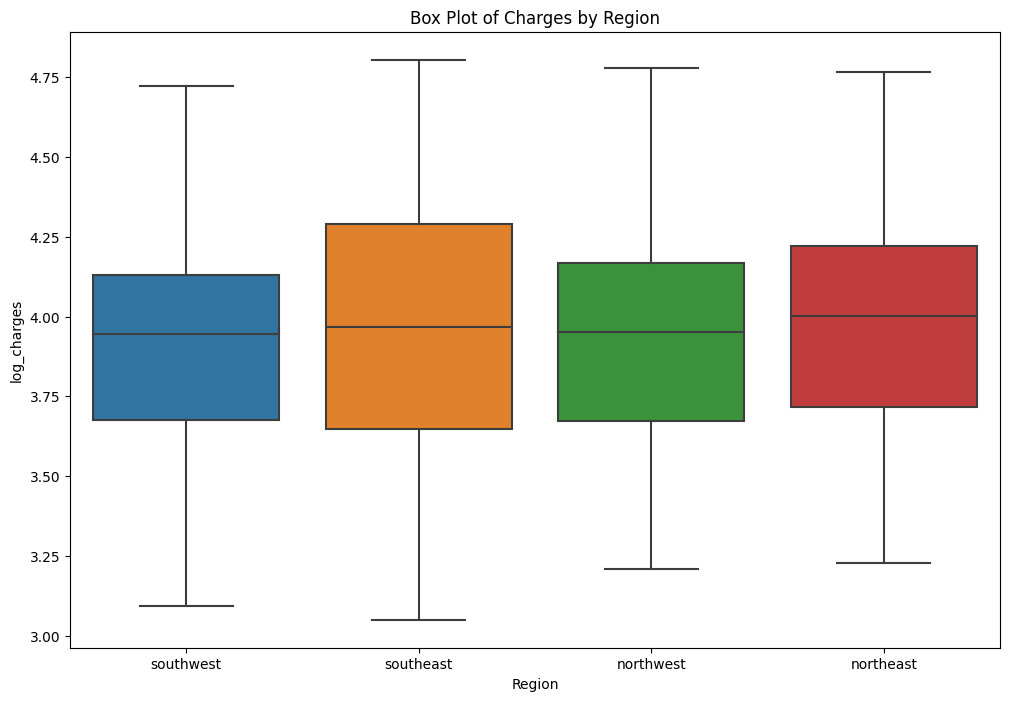

In [96]:
plt.figure(figsize=(12, 8))

# Create box plots for the charges across the 4 regions
sns.boxplot(x='region', y='log_charges', data=insurance)

# Set the title and labels
plt.title('Box Plot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('log_charges')

# Show the plot



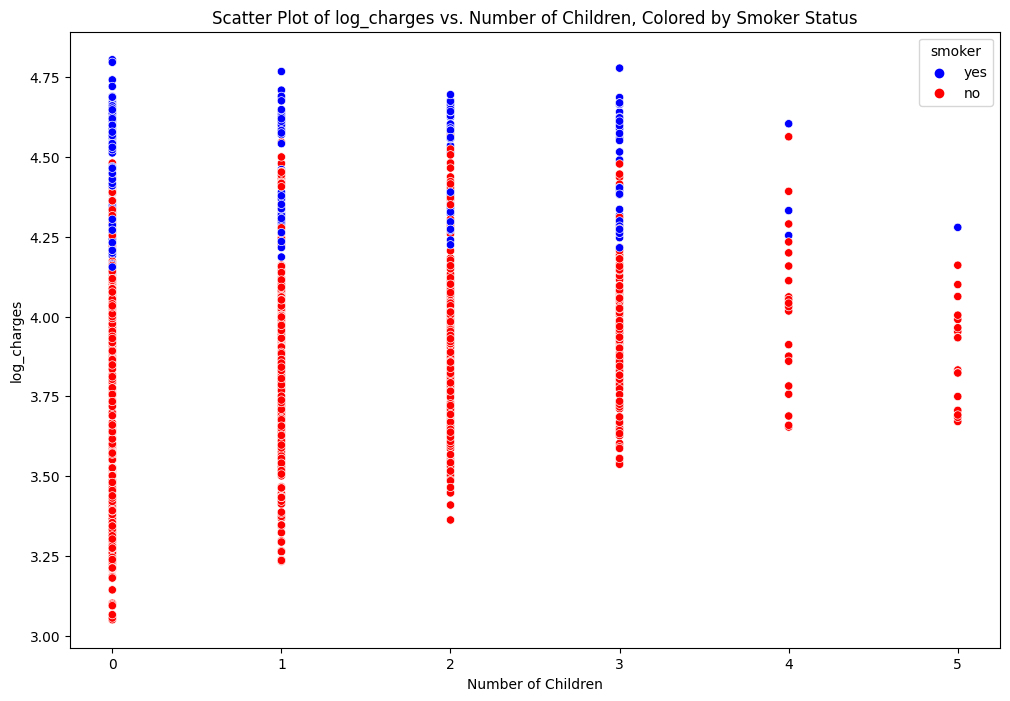

In [97]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='children', y='log_charges', hue='smoker', data=insurance, palette=['blue', 'red'])

# Set the title and labels
plt.title('Scatter Plot of log_charges vs. Number of Children, Colored by Smoker Status')
plt.xlabel('Number of Children')
plt.ylabel('log_charges')

# Show the plot
plt.show()

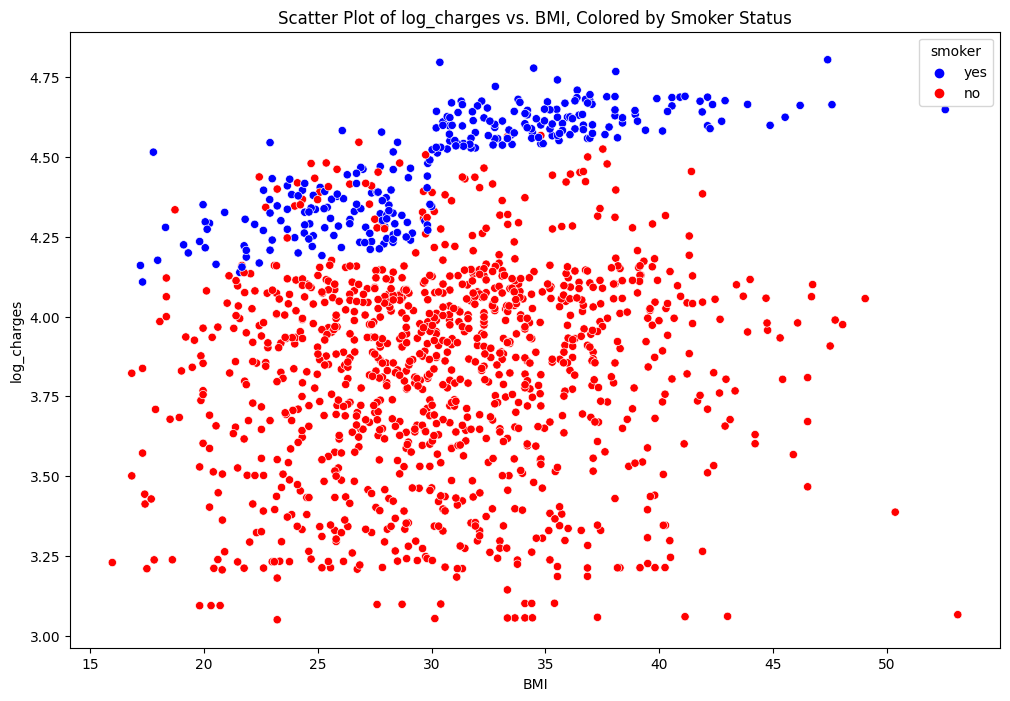

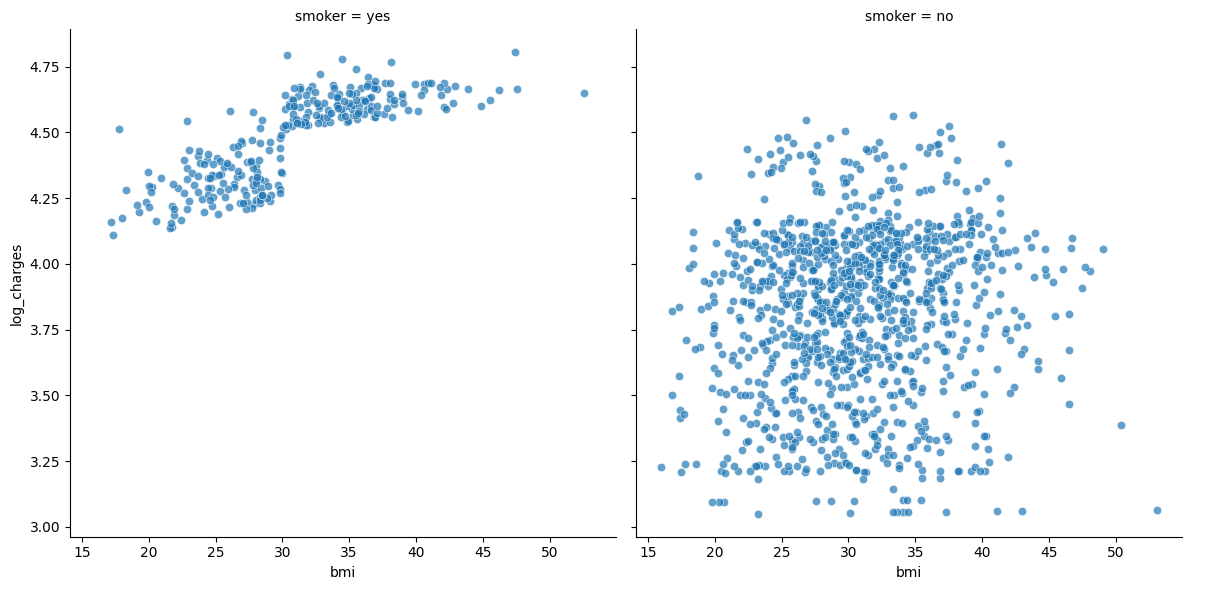

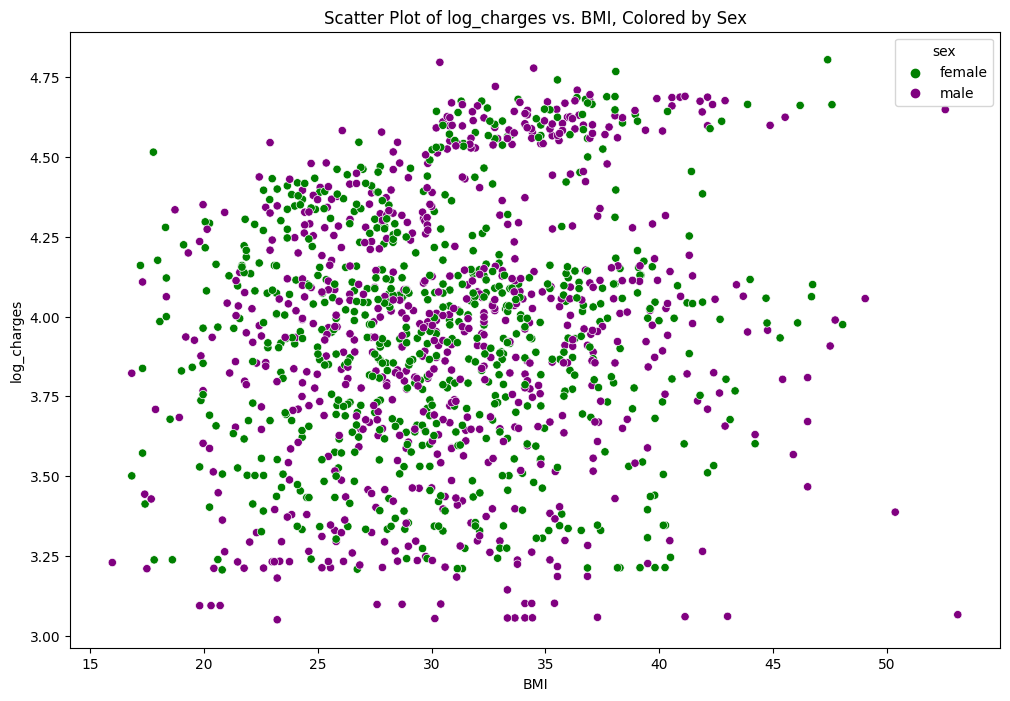

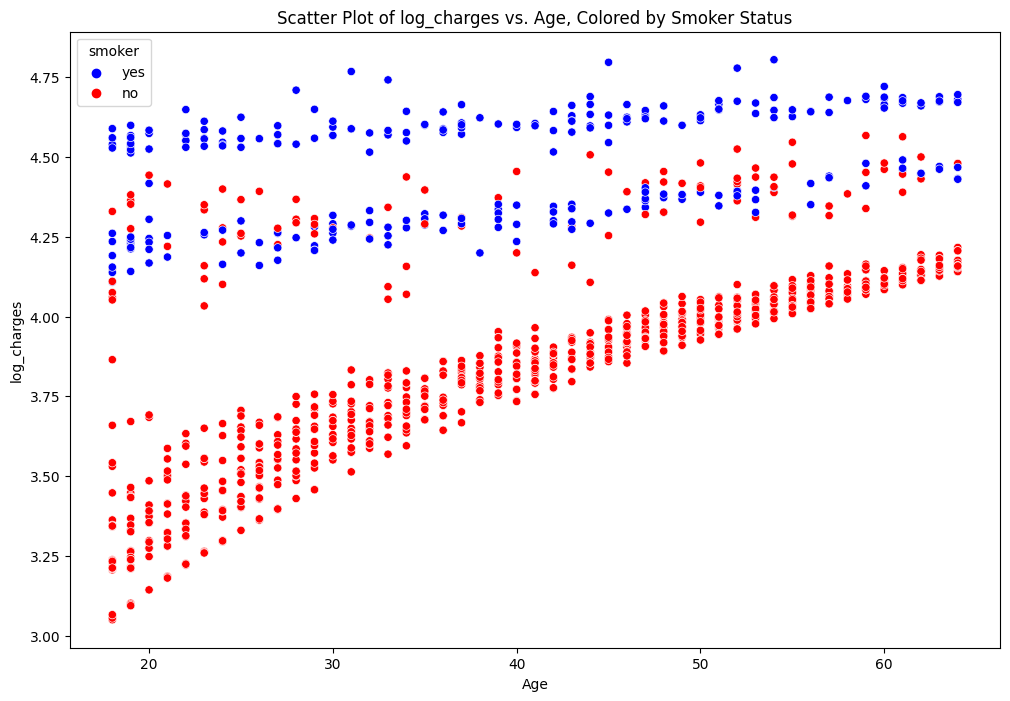

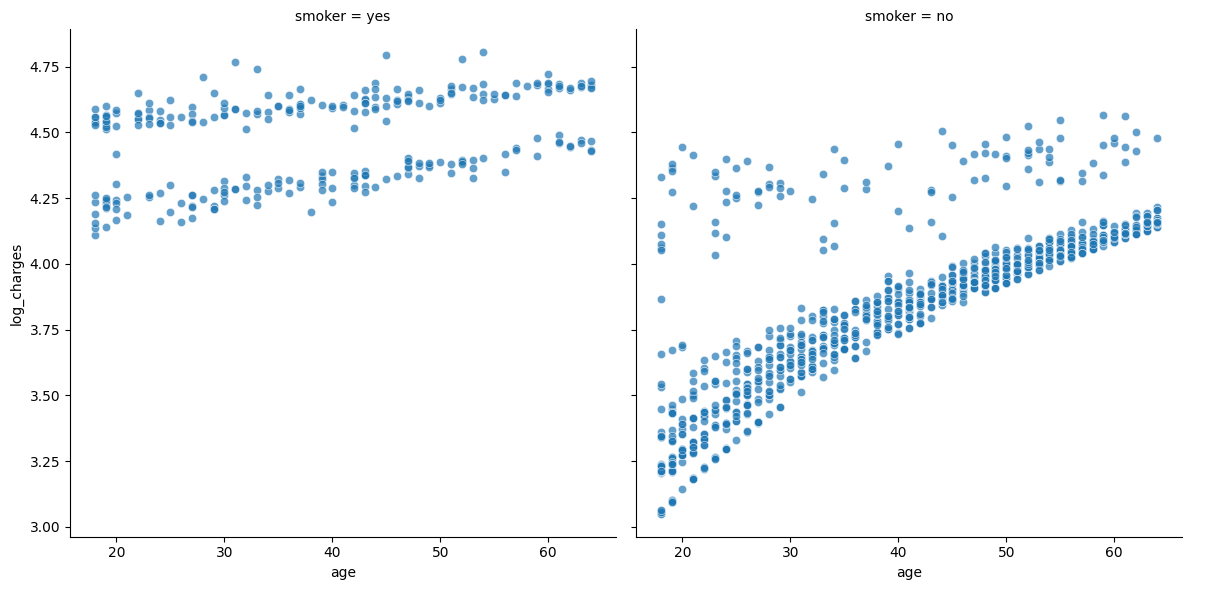

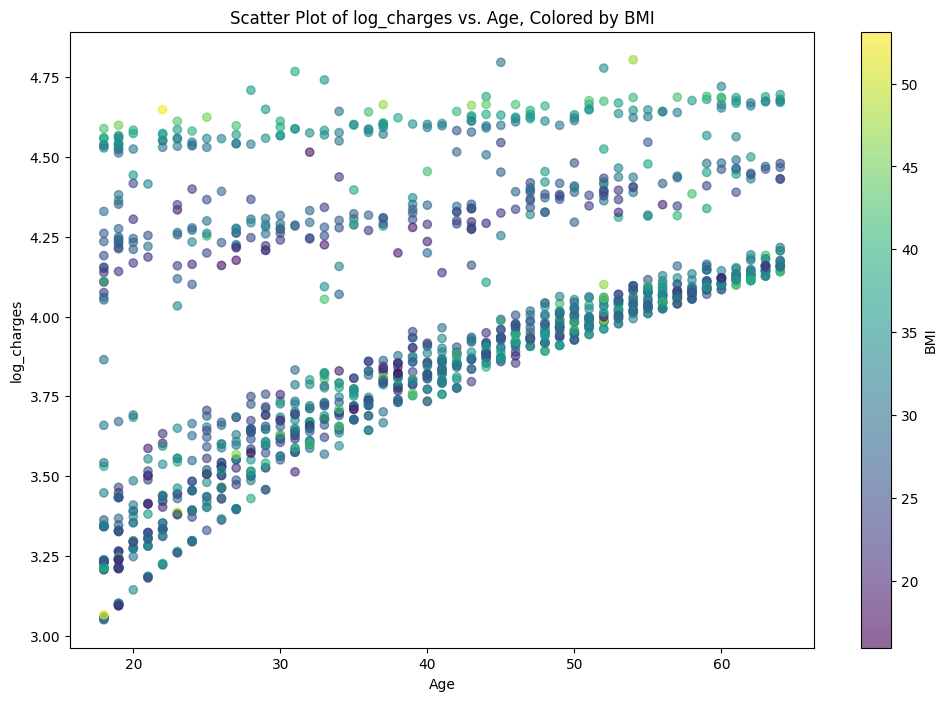

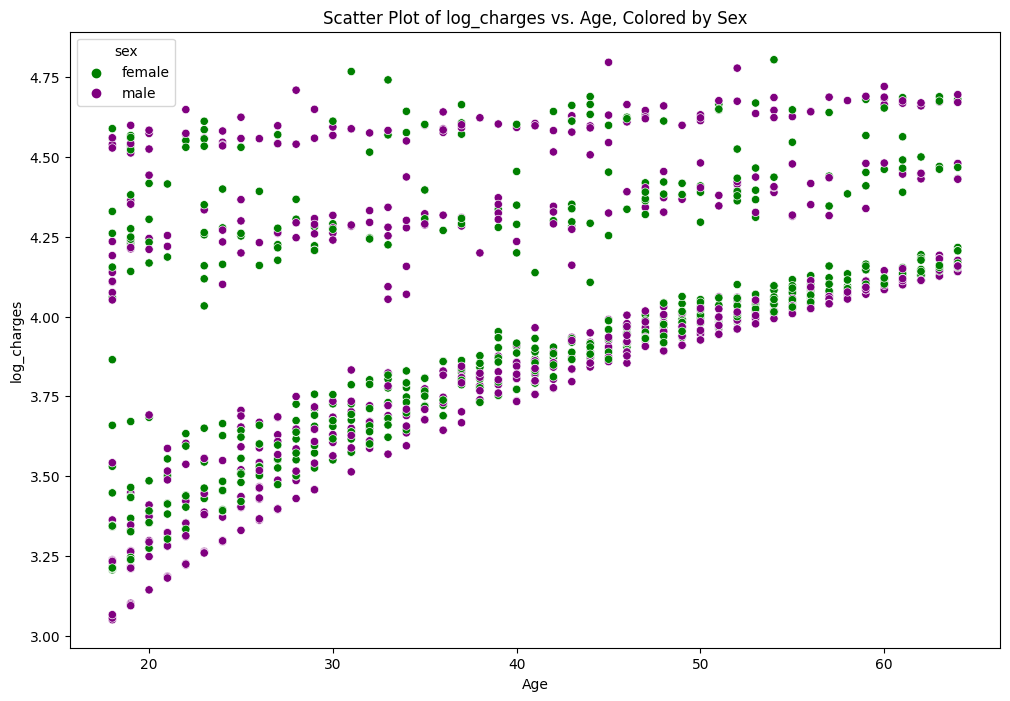

In [98]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='log_charges', hue='smoker', data=insurance, palette=['blue', 'red'])

# Set the title and labels
plt.title('Scatter Plot of log_charges vs. BMI, Colored by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('log_charges')

g = sns.FacetGrid(insurance, col="smoker", height=6, aspect=1)
g.map(sns.scatterplot, "bmi", "log_charges", alpha=.7)
g.add_legend()
plt.show()


# Show the plot
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='log_charges', hue='sex', data=insurance, palette=['green', 'purple'])

# Set the title and labels
plt.title('Scatter Plot of log_charges vs. BMI, Colored by Sex')
plt.xlabel('BMI')
plt.ylabel('log_charges')

# Show the plot
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='log_charges', hue='smoker', data=insurance, palette=['blue', 'red'])

# Set the title and labels
plt.title('Scatter Plot of log_charges vs. Age, Colored by Smoker Status')
plt.xlabel('Age')
plt.ylabel('log_charges')

# Show the plot
plt.show()

h = sns.FacetGrid(insurance, col="smoker", height=6, aspect=1)
h.map(sns.scatterplot, "age", "log_charges", alpha=.7)
h.add_legend()
plt.show()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=insurance['age'], y=insurance['log_charges'], c=insurance['bmi'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='BMI')
plt.title('Scatter Plot of log_charges vs. Age, Colored by BMI')
plt.xlabel('Age')
plt.ylabel('log_charges')
plt.show()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='log_charges', hue='sex', data=insurance, palette=['green', 'purple'])

# Set the title and labels
plt.title('Scatter Plot of log_charges vs. Age, Colored by Sex')
plt.xlabel('Age')
plt.ylabel('log_charges')

# Show the plot
plt.show()

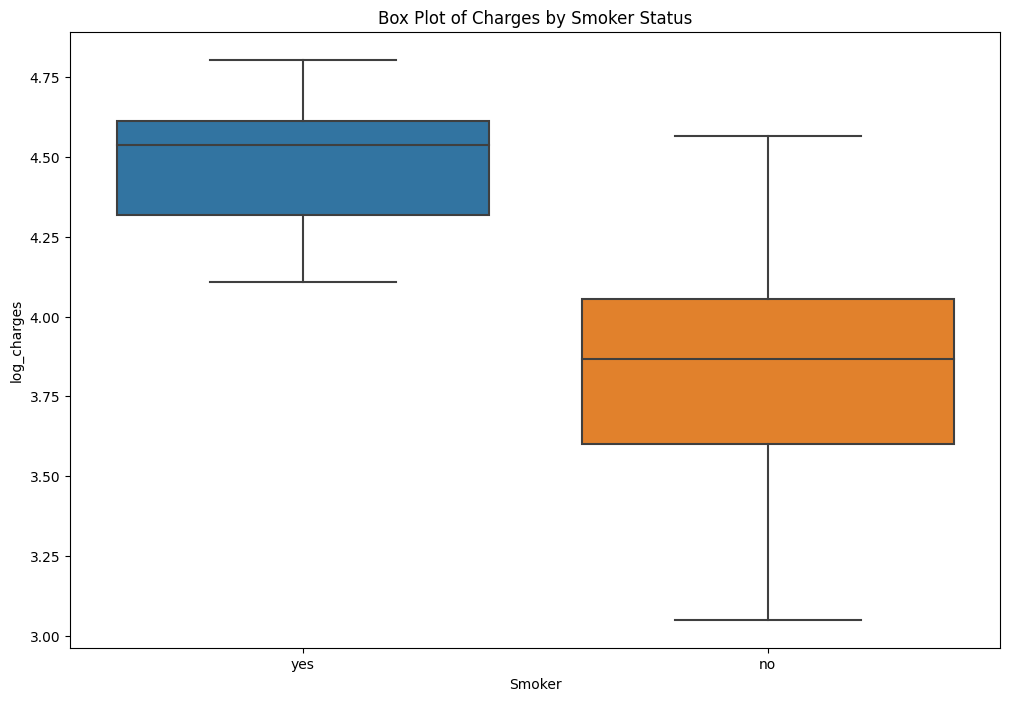

In [99]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='log_charges', data=insurance)
plt.title('Box Plot of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('log_charges')
plt.show()

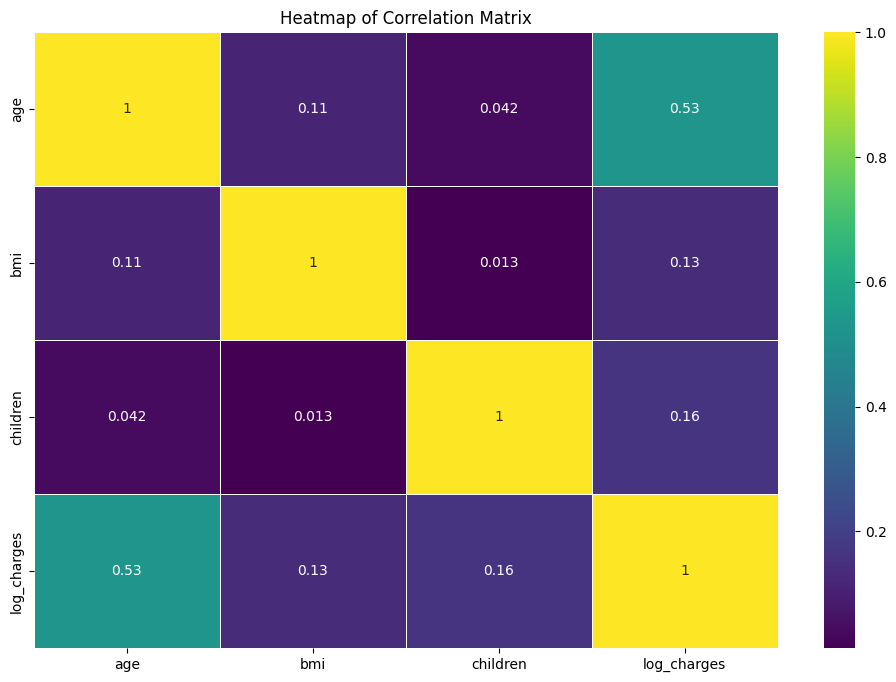

In [100]:

plt.figure(figsize=(12, 8))
data = insurance[["age", "bmi", "smoker","children","log_charges"]]
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()




In [101]:
predictors = ["age", "bmi", "smoker","children"]
target = "log_charges"

X = insurance[predictors]
y = insurance[target]

X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})

# Set the proportion for the test set
test_size = 0.2  # 20% for the test set

# Set a random seed for reproducibility
random_seed = 42

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# Print the sizes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1070 samples
Test set size: 268 samples


/tmp/ipykernel_82/1535773569.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})


In [102]:
X

,age,bmi,smoker,children
0,19,27.900,1,0
1,18,33.770,0,1
2,28,33.000,0,3
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,0,3
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [103]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Create a DataFrame with the scaled features
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=predictors)

In [104]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_scaled)

# Examine the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Calculate R^2 and MSE
r2_train = model.score(X_train_scaled, y_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R^2 (training set):", r2_train)
print("Mean Squared Error (training set):", mse_train)


Coefficients: [0.20971256 0.02986418 0.27096254 0.04884577]
Intercept: 3.957865603165116
R^2 (training set): 0.7522390052182406
Mean Squared Error (training set): 0.03879757078951875


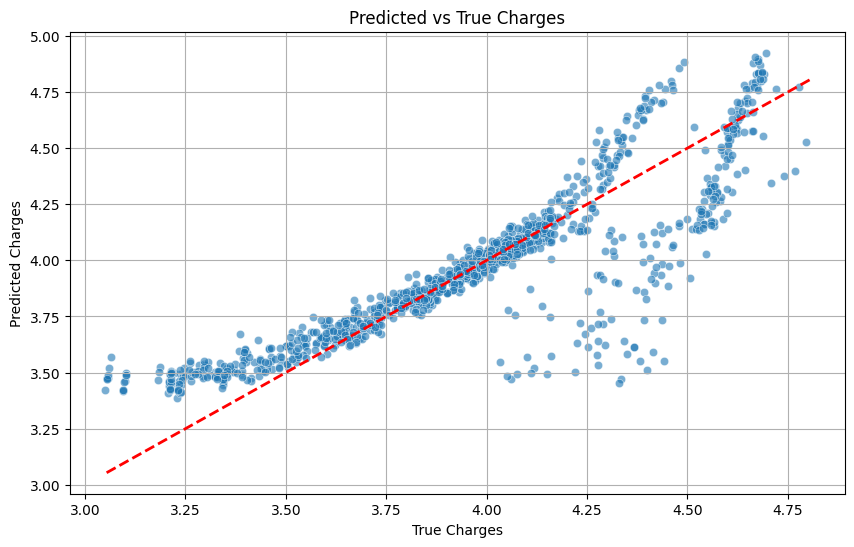

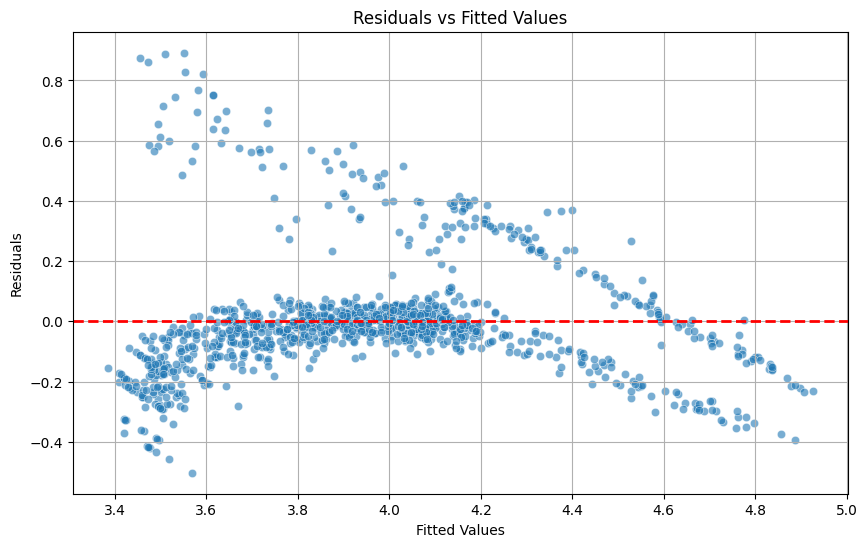

In [68]:
y_train_pred = model.predict(X_train_scaled)

# Plot predicted vs true values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.xlabel('True Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs True Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

residuals = y_train - y_train_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.grid(True)
plt.show()

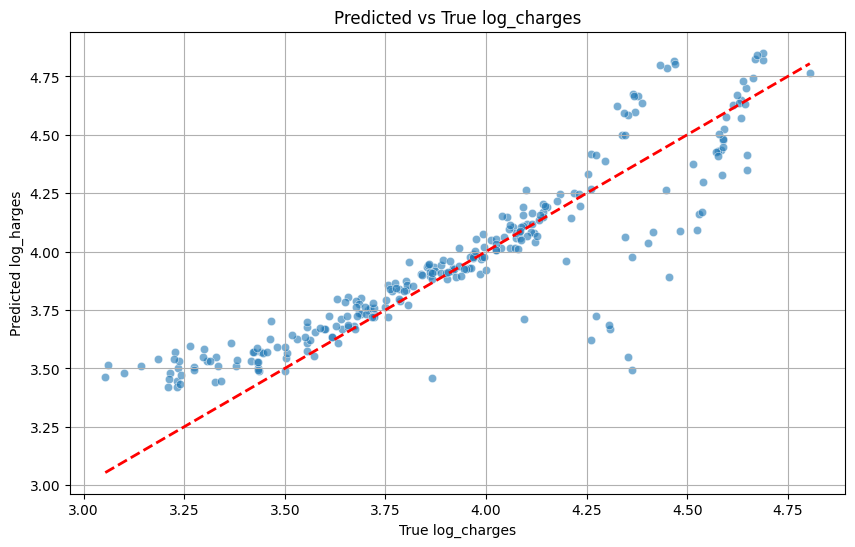

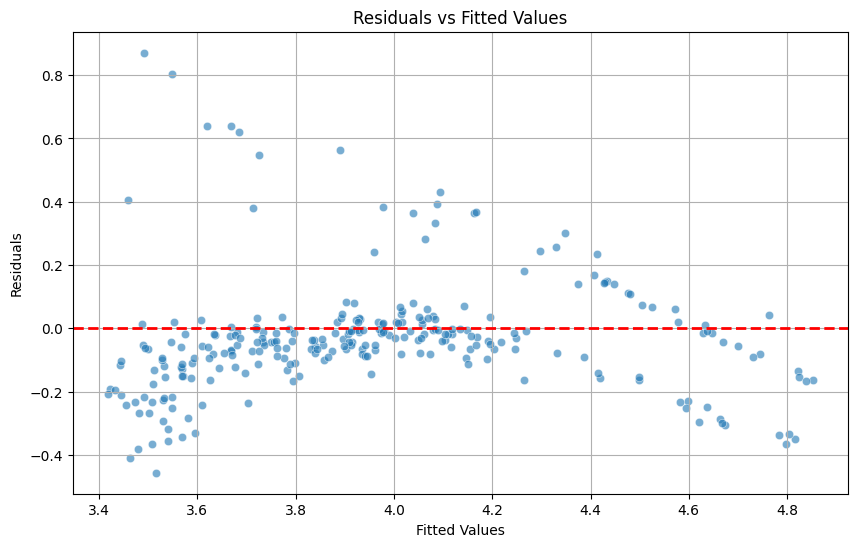

Mean Squared Error (training set): 0.03509011210070654


In [105]:
y_test_pred = model.predict(X_test_scaled)

# Plot predicted vs true values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_harges')
plt.title('Predicted vs True log_charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

residuals = y_test - y_test_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.grid(True)
plt.show()

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (training set):", mse_test)



Mean Squared Error: 0.02007716242241841


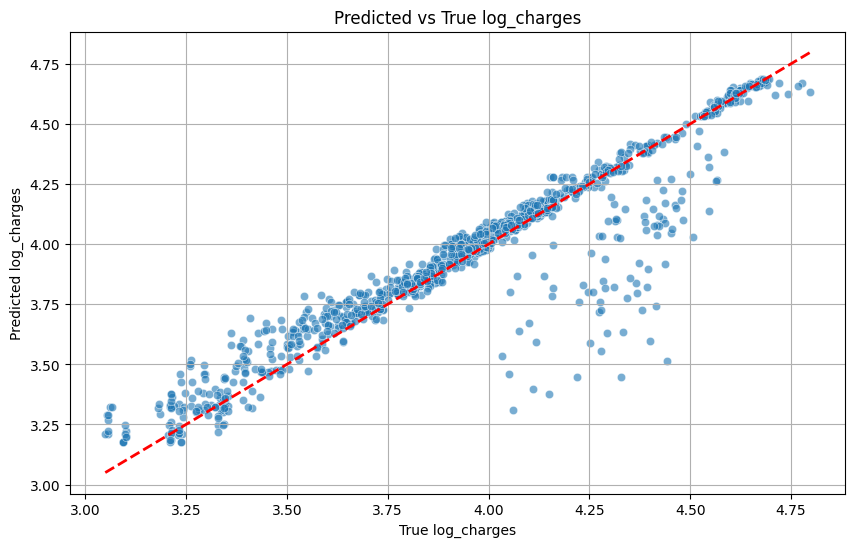

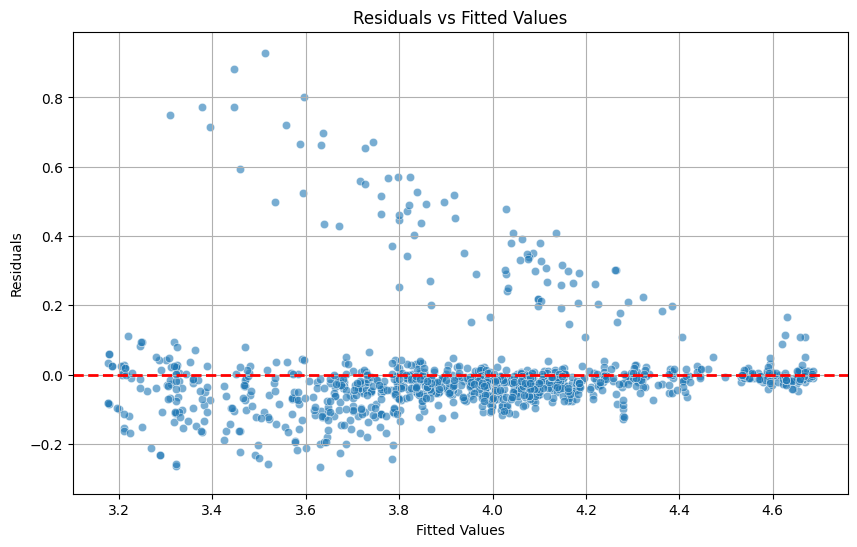

Mean Squared Error: 0.02445167364594328


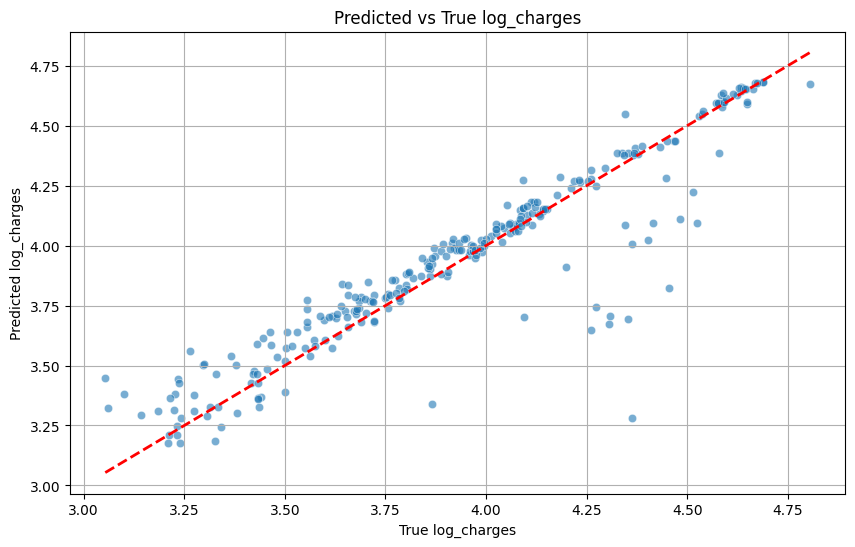

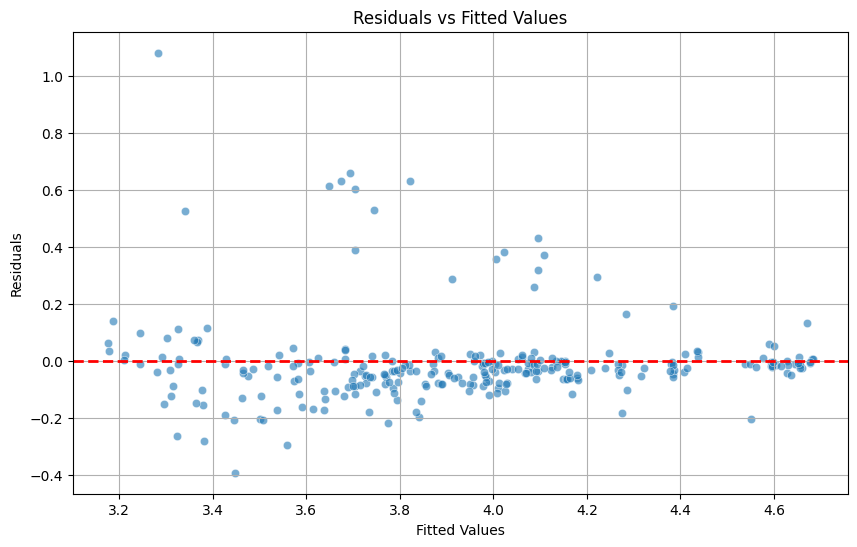

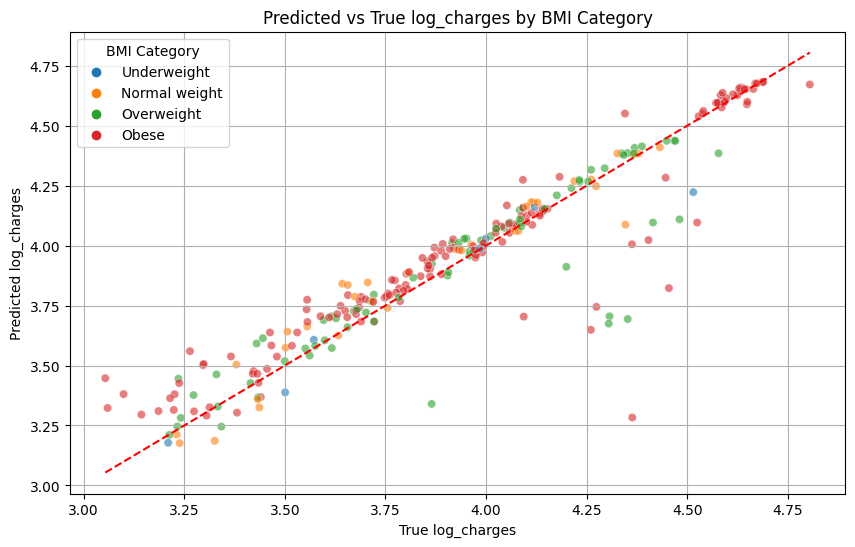

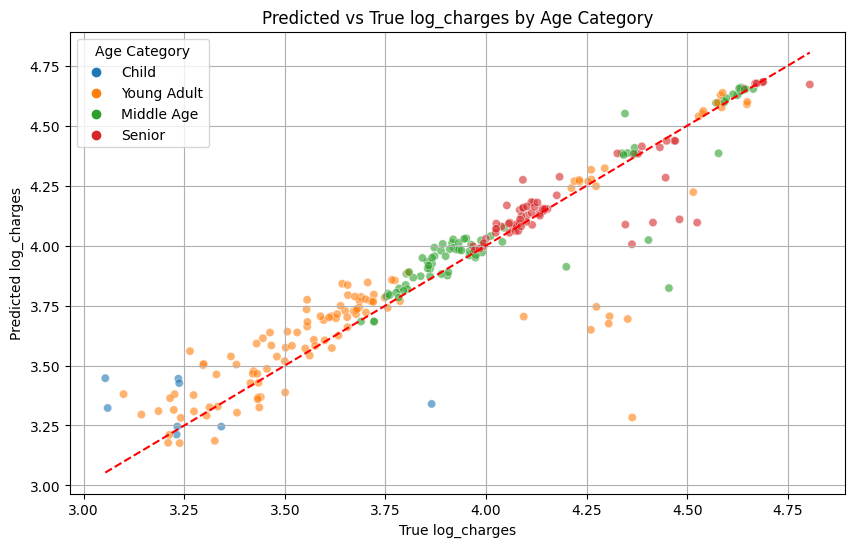

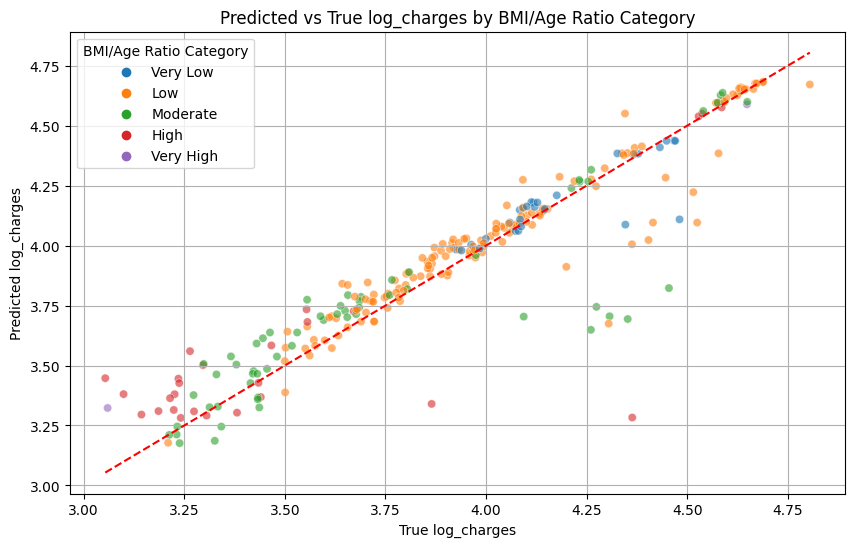

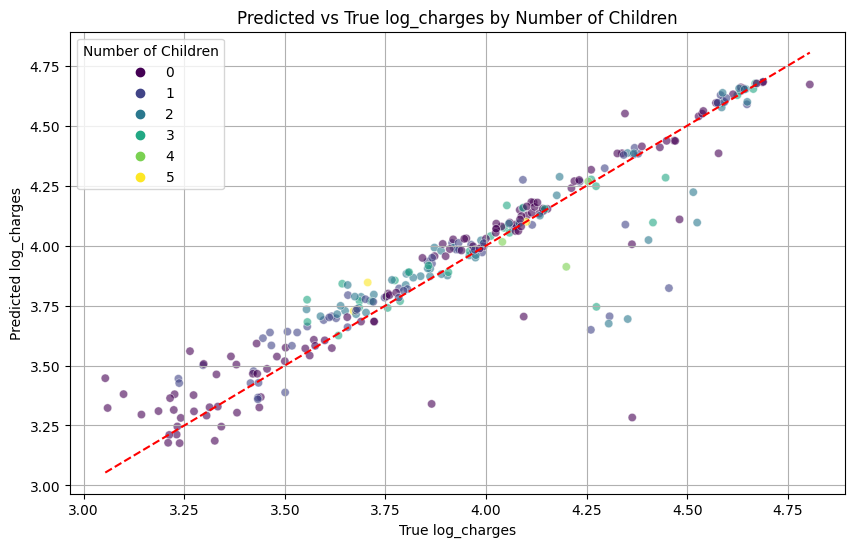

In [106]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=5, min_samples_split=12)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.6)
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

residuals = y_train - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.grid(True)
plt.show()

# Predict and evaluate
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

residuals = y_test - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.grid(True)
plt.show()


results = pd.DataFrame({'True log_charges': y_test, 'Predicted log_charges': y_pred})
results.reset_index(drop=True, inplace=True)

results['bmi'] = insurance.loc[y_test.index, 'bmi'].values
results['age'] = insurance.loc[y_test.index, 'age'].values
results['bmi_age_ratio'] = results['bmi'] / results['age']
results['children'] = insurance.loc[y_test.index, 'children'].values

# Create BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
results['bmi_category'] = pd.cut(results['bmi'], bins=bmi_bins, labels=bmi_labels)

# Create age categories
age_bins = [0, 18, 35, 50, np.inf]
age_labels = ['Child', 'Young Adult', 'Middle Age', 'Senior']
results['age_category'] = pd.cut(results['age'], bins=age_bins, labels=age_labels)

ratio_bins = [0, 0.5, 1, 1.5, 2, np.inf]
ratio_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
results['bmi_age_ratio_category'] = pd.cut(results['bmi_age_ratio'], bins=ratio_bins, labels=ratio_labels)


# Plotting by BMI category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True log_charges', y='Predicted log_charges', hue='bmi_category', data=results, alpha=0.6)
plt.plot([results['True log_charges'].min(), results['True log_charges'].max()], 
         [results['True log_charges'].min(), results['True log_charges'].max()], 'r--')
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges by BMI Category')
plt.legend(title='BMI Category')
plt.grid(True)
plt.show()

# Plotting by Age category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True log_charges', y='Predicted log_charges', hue='age_category', data=results, alpha=0.6)
plt.plot([results['True log_charges'].min(), results['True log_charges'].max()], 
         [results['True log_charges'].min(), results['True log_charges'].max()], 'r--')
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges by Age Category')
plt.legend(title='Age Category')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='True log_charges', y='Predicted log_charges', hue='bmi_age_ratio_category', data=results, alpha=0.6)
plt.plot([results['True log_charges'].min(), results['True log_charges'].max()], 
         [results['True log_charges'].min(), results['True log_charges'].max()], 'r--')
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges by BMI/Age Ratio Category')
plt.legend(title='BMI/Age Ratio Category')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='True log_charges', y='Predicted log_charges', hue='children', data=results, palette='viridis', alpha=0.6)
plt.plot([results['True log_charges'].min(), results['True log_charges'].max()], 
         [results['True log_charges'].min(), results['True log_charges'].max()], 'r--')
plt.xlabel('True log_charges')
plt.ylabel('Predicted log_charges')
plt.title('Predicted vs True log_charges by Number of Children')
plt.legend(title='Number of Children')
plt.grid(True)
plt.show()



